#IA - <font color='blue'> Avaliação de algoritmos de AM em Python</font> - Trabalho 3

---
João Vitor Fidelis Cardozo, 769719 \\
Sara Ferreira, 773352

1) Selecionar um conjunto de dados adequado para problemas de classificação e carregar o conjunto com a função load_\<nome_do_arquivo\> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statistics
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

warnings.filterwarnings('ignore')
X, y = datasets.load_wine(return_X_y=True)  #Conjunto adequado para classificação https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

4) Separar o conjunto de dados em matriz de atributos (X) e vetor de classes (y)

In [9]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

#Código para printar a tabela
data = pd.DataFrame(wine.data, columns=wine.feature_names)   # converting dataset into pandas dataframe for preprocessing
data['class'] = wine.target

Y = data['class']                # Output for each example
X = data.drop('class', axis=1)   # Inputs

data = data.sample(frac=1)
data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0,1
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,2
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0


6) Implementar uma função que, dado um conjunto de dados, separe esse conjunto em 10 folds (10 folds).

In [10]:
len_df = data.shape[0]
iterations, remaining = int(len_df/10), (len_df%10)
folds = []

#Distribui os elementos do conjunto de forma equivalente, contendo 17 elementos cada subconjunto, pois é a parte inteira da divisão.
for linha in range(10):
  folds.append(data.iloc[(linha*17):(linha+1)*17])

#Redistribuir resto (8 elementos). Redistribui 1 elemento para os 8 primeiros subconjuntos.
for rest in range(remaining):
  folds[rest] = pd.concat([folds[rest], data.iloc[(iterations*10)+rest:(iterations*10)+1+rest]], ignore_index = True)

#for i in range(10):
  #print(folds[i])


7) Dados os 10 folds, avaliar um algoritmo de indução de árvores de decisão usando a estratégia
10-fold cross-validation, ou seja, em cada uma das 10 iterações, treinar o algoritmo em 9 folds
(folds de treinamento) e testar no fold remaining (fold de teste), cada vez com um fold de teste
diferente.

********************************************************************************
Assumindo que i seja o subconjunto de teste, os outros são de treino, então pra cada iteração, foi denotado i para teste e os outros 9 para treino.

In [11]:
#Vetor para armazenar subconjuntos de teste e de treino
xtrain = []
xtest = []
ytrain = []
ytest = []

for i in range(10):
  testSubset = folds[i]
  x_test, y_test =  testSubset.drop('class', axis=1), testSubset['class']
  xtest.append(x_test), ytest.append(y_test)
  trainSubset = pd.DataFrame(None)
  if (i<9):
    for j in range(i+1, 10):
      trainSubset = pd.concat([trainSubset, folds[j]], ignore_index=True)
    y_train, x_train = trainSubset['class'], trainSubset.drop('class', axis=1)
    xtrain.append(x_train), ytrain.append(y_train)
  else:
    for k in range(9):
       trainSubset = pd.concat([trainSubset, folds[k]], ignore_index=True)
       y_train, x_train = trainSubset['class'], trainSubset.drop('class', axis=1)
    xtrain.append(x_train), ytrain.append(y_train)

8) Quando treinando o algoritmo de indução de árvore de decisão, usar a função fit(...) da classe
DecisionTreeClassifier do módulo sklearn.tree, com o atributo criterion=’entropy’;
********************************************************************************
Como é possível visualizara baixo, temos a função fit da classe DecisionTreeClassifier do módulo sklearn.tree utilizada, de acordo com o proposto.

In [12]:
vector_clfs = []

for i in range(10):
  clf = tree.DecisionTreeClassifier(criterion='entropy')
  vector_clfs.append(clf.fit(xtrain[i], ytrain[i]))

9) Escolha um dos folds para gerar a figura da árvore de decisão com a função plot_tree(...) do
módulo sklearn.tree;
********************************************************************************
O fold escolhido para gerar a figura da árvore de decisão, foi o de índice 0 (começa no 0 e termina no 17), contendo 18 tuplas ou linhas.

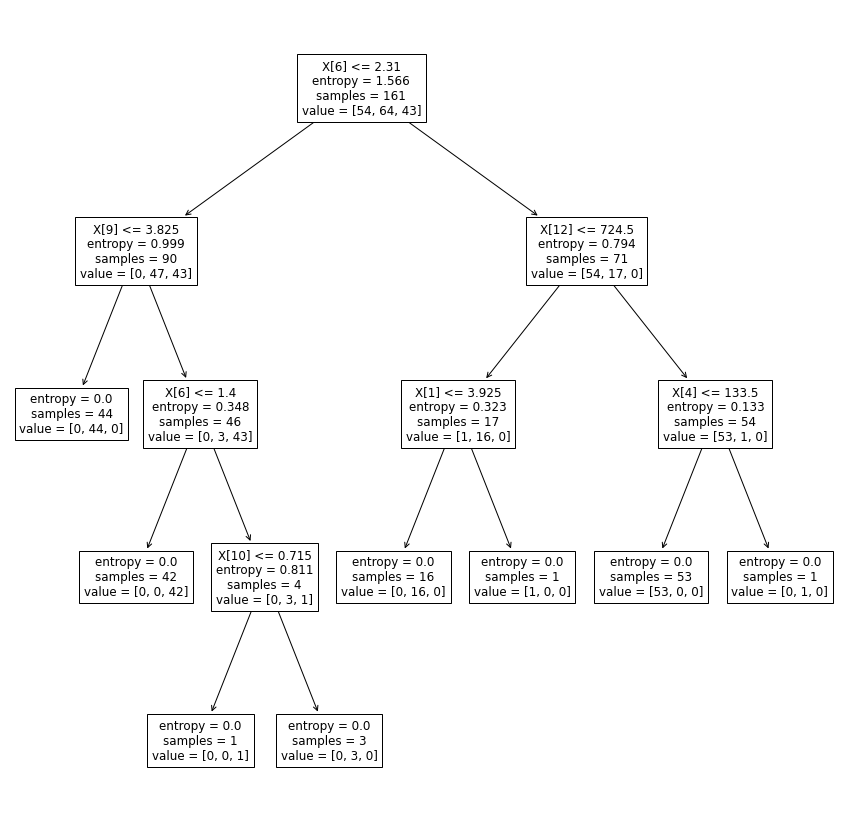

In [13]:
fig = plt.figure(figsize=(15,15))
fig = tree.plot_tree(clf)

#predição do modelo de testes
predicted = clf.predict(folds[0].drop('class', axis=1))

10) Em cada um dos folds, fazer a classificação dos dados de teste usando a função predict(...) da
classe DecisionTreeClassifier do módulo sklearn.tree;

In [14]:
dataTestClassifier = []
for i in range(10):
  dataTestClassifier.append(vector_clfs[i].predict(xtest[i]))

11) Em cada um dos folds, fazer a avaliação do modelo gerado usando os dados de teste e mostrando
os resultados das funções confusion_matrix(...) e classification_report(...) do modulo
sklearn.metrics;

              precision    recall  f1-score   support

           0     0.8750    1.0000    0.9333         7
           1     0.8333    0.8333    0.8333         6
           2     1.0000    0.8000    0.8889         5

    accuracy                         0.8889        18
   macro avg     0.9028    0.8778    0.8852        18
weighted avg     0.8958    0.8889    0.8877        18



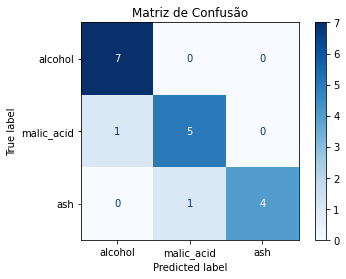

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         7
           1     1.0000    0.8333    0.9091         6
           2     0.8333    1.0000    0.9091         5

    accuracy                         0.9444        18
   macro avg     0.9444    0.9444    0.9394        18
weighted avg     0.9537    0.9444    0.9444        18



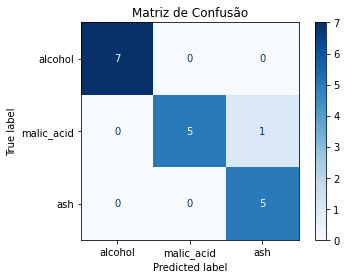

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     1.0000    1.0000    1.0000        10
           2     1.0000    1.0000    1.0000         2

    accuracy                         1.0000        18
   macro avg     1.0000    1.0000    1.0000        18
weighted avg     1.0000    1.0000    1.0000        18



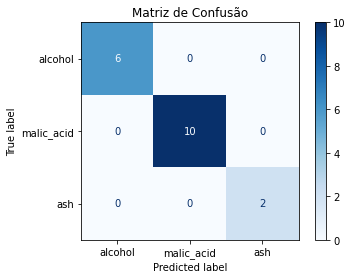

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000         4
           2     1.0000    1.0000    1.0000         6

    accuracy                         1.0000        18
   macro avg     1.0000    1.0000    1.0000        18
weighted avg     1.0000    1.0000    1.0000        18



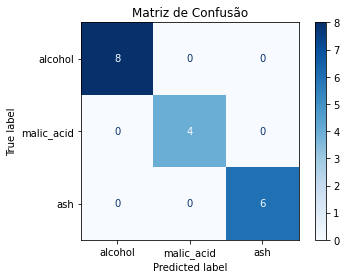

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000         3

    accuracy                         1.0000        18
   macro avg     1.0000    1.0000    1.0000        18
weighted avg     1.0000    1.0000    1.0000        18



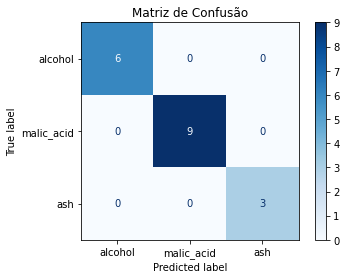

              precision    recall  f1-score   support

           0     0.8000    0.8000    0.8000         5
           1     0.8750    0.8750    0.8750         8
           2     1.0000    1.0000    1.0000         5

    accuracy                         0.8889        18
   macro avg     0.8917    0.8917    0.8917        18
weighted avg     0.8889    0.8889    0.8889        18



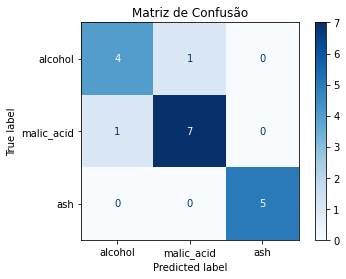

              precision    recall  f1-score   support

           0     1.0000    0.8750    0.9333         8
           1     0.5556    1.0000    0.7143         5
           2     1.0000    0.4000    0.5714         5

    accuracy                         0.7778        18
   macro avg     0.8519    0.7583    0.7397        18
weighted avg     0.8765    0.7778    0.7720        18



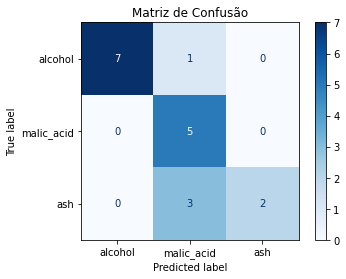

              precision    recall  f1-score   support

           0     0.6000    1.0000    0.7500         3
           1     1.0000    0.9091    0.9524        11
           2     1.0000    0.7500    0.8571         4

    accuracy                         0.8889        18
   macro avg     0.8667    0.8864    0.8532        18
weighted avg     0.9333    0.8889    0.8975        18



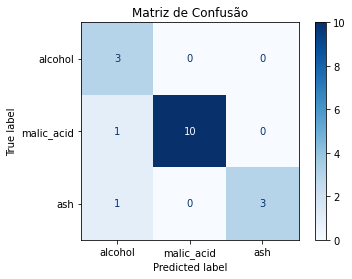

              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889         4
           1     0.8000    0.8000    0.8000         5
           2     1.0000    0.8750    0.9333         8

    accuracy                         0.8824        17
   macro avg     0.8667    0.8917    0.8741        17
weighted avg     0.8941    0.8824    0.8837        17



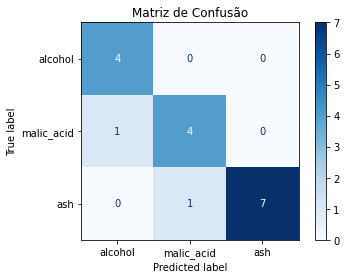

              precision    recall  f1-score   support

           0     0.6667    0.8000    0.7273         5
           1     0.8333    0.7143    0.7692         7
           2     1.0000    1.0000    1.0000         5

    accuracy                         0.8235        17
   macro avg     0.8333    0.8381    0.8322        17
weighted avg     0.8333    0.8235    0.8248        17



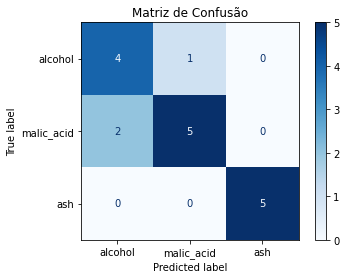

In [15]:
class_names = list(data.columns)
title = "Matriz de Confusão"
classification_reports = []
for i in range(10):
  #predicted = clf[i].predict(xtest[i])
  disp = plot_confusion_matrix(vector_clfs[i], xtest[i], ytest[i], display_labels=class_names, cmap=plt.cm.Blues)
  disp.ax_.set_title(title)
  print(classification_report(ytest[i], dataTestClassifier[i], digits=4))
  classification_reports.append(classification_report(ytest[i], dataTestClassifier[i], digits=4, output_dict=True))
  plt.show()

12) Ao final das 10 execuções do 10-fold cross-validation, apresentar as médias e desvios padrões
dos 10 resultados das medidas de avaliação da função classification_report(...) do modulo
sklearn.metrics

In [16]:
classificationDataFrames = [] 
for i in range(len(classification_reports)):
  classificationDataFrames.append(pd.DataFrame(classification_reports[i]).transpose())

for i in range(len(classification_reports)):  
  print(f'{classificationDataFrames[i].describe()}\n\n')

       precision    recall  f1-score    support
count   6.000000  6.000000  6.000000   6.000000
mean    0.899306  0.881481  0.886214   9.148148
std     0.055164  0.068011  0.031730   7.164614
min     0.833333  0.800000  0.833333   0.888889
25%     0.878472  0.844444  0.885802   5.250000
50%     0.892361  0.883333  0.888272   6.500000
75%     0.901042  0.888889  0.888889  15.250000
max     1.000000  1.000000  0.933333  18.000000


       precision    recall  f1-score    support
count   6.000000  6.000000  6.000000   6.000000
mean    0.945988  0.944444  0.941077   9.157407
std     0.060975  0.060858  0.033298   7.151829
min     0.833333  0.833333  0.909091   0.944444
25%     0.944444  0.944444  0.916667   5.250000
50%     0.949074  0.944444  0.941919   6.500000
75%     0.988426  0.986111  0.944444  15.250000
max     1.000000  1.000000  1.000000  18.000000


       precision  recall  f1-score    support
count        6.0     6.0       6.0   6.000000
mean         1.0     1.0       1.0   9.1